In [7]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG19, VGG16
from tensorboard import notebook
from tensorflow import keras 
from tensorflow.keras.applications.resnet import ResNet50
from keras import models, layers
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory
from tensorflow.keras.layers import ( Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Concatenate, GlobalMaxPooling2D, Dropout,
    Dense, Lambda, Reshape, Activation, Multiply, Add, UpSampling2D, LayerNormalization )
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [8]:
def load_model():
    K.clear_session()
    inputs = Input(shape=(241, 241, 3))

    x = Conv2D(96, 9, strides=4, padding='valid')(inputs)
    x = ReLU()(x)
    x = LayerNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

    x = Conv2D(256, 7, strides=1, padding='same')(x)
    x = ReLU()(x)
    x = LayerNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

    x = Conv2D(384, 3, strides=1, padding='same')(x)
    x = ReLU()(x)

    x = Conv2D(384, 3, strides=1, padding='same')(x)
    x = ReLU()(x)

    x = Conv2D(256, 3, strides=1, padding='same')(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs= inputs, outputs=x)
    
    return model



100%|██████████| 186/186 [00:00<00:00, 190.98it/s]


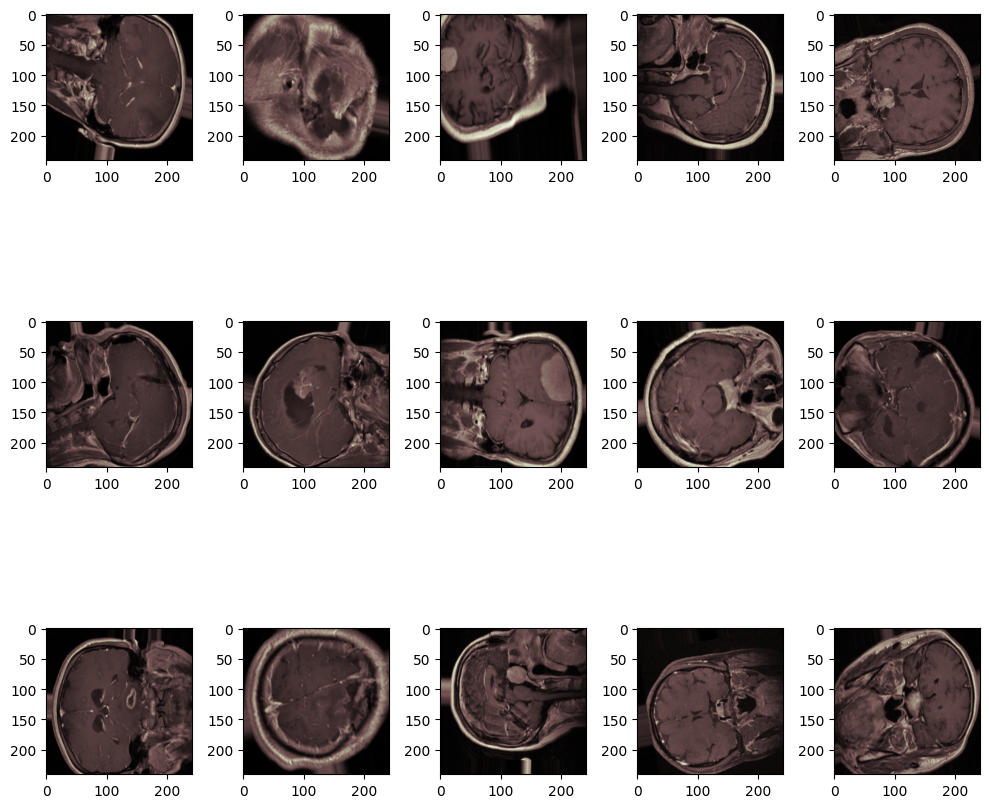

In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 241
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [4]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"


2024-03-15 19:01:22.257837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 19:01:22.561740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 241, 241, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 59, 59, 96)        23424     
                                                                 
 re_lu (ReLU)                (None, 59, 59, 96)        0         
                                                                 
 layer_normalization (LayerN  (None, 59, 59, 96)       192       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       1204480   
          

In [5]:
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-DNNwithSVM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

Epoch 1/50


2024-03-15 19:01:50.333755: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-15 19:01:51.217572: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-15 19:01:51.217589: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-15 19:01:51.217676: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-15 19:01:51.748686: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.0656 - accuracy: 0.4157
Epoch 1: saving model to model-DNNwithSVM.h5
Epoch 1: 8.96 seconds
264/264 [==============================] - 9s 19ms/step - loss: 1.0656 - accuracy: 0.4157 - val_loss: 0.9410 - val_accuracy: 0.5114 - lr: 1.0000e-04
Epoch 2/50
261/264 [============================>.] - ETA: 0s - loss: 0.8871 - accuracy: 0.5775
Epoch 2: saving model to model-DNNwithSVM.h5
Epoch 2: 3.83 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8868 - accuracy: 0.5776 - val_loss: 0.8403 - val_accuracy: 0.6034 - lr: 1.0000e-04
Epoch 3/50
261/264 [============================>.] - ETA: 0s - loss: 0.8096 - accuracy: 0.6326
Epoch 3: saving model to model-DNNwithSVM.h5
Epoch 3: 3.85 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8094 - accuracy: 0.6326 - val_loss: 0.7876 - val_accuracy: 0.6328 - lr: 1.0000e-04
Epoch 4/50
261/264 [============================>.] - ETA: 0s - loss: 0.756

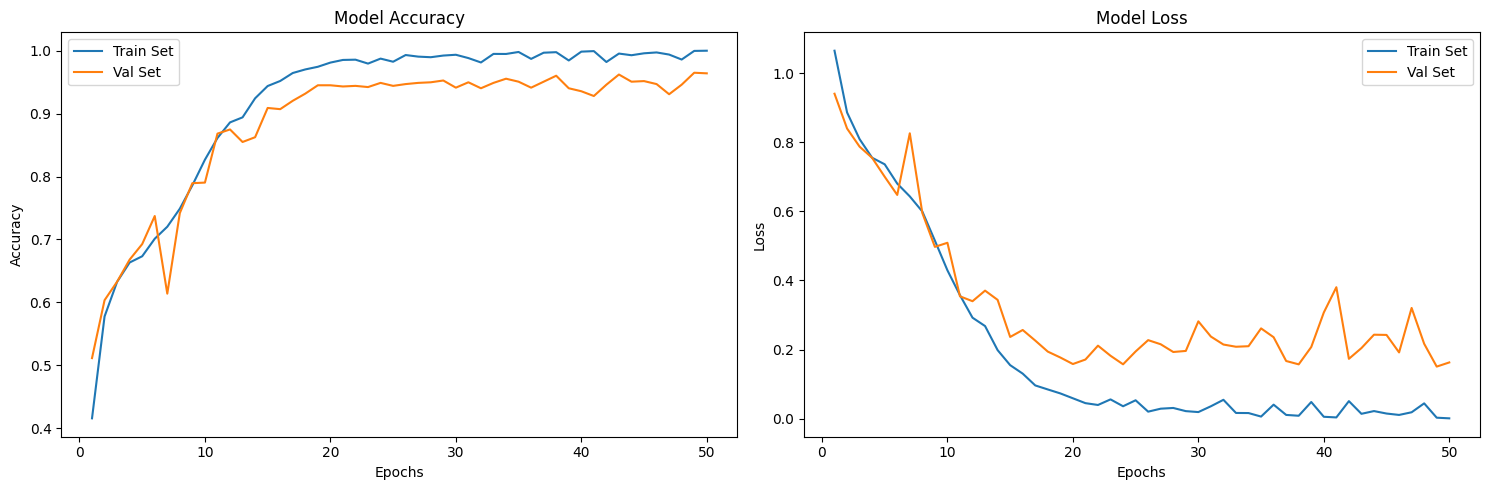

In [6]:
draw_curve(history)

20/20 [==============================] - 0s 6ms/step - loss: 0.1900 - accuracy: 0.9446
Test Accuracy:  94.46
              precision    recall  f1-score   support

      glioma     0.9744    0.9301    0.9517       286
  meningioma     0.9041    0.9296    0.9167       142
   pituitary     0.9333    0.9785    0.9554       186

    accuracy                         0.9446       614
   macro avg     0.9373    0.9460    0.9412       614
weighted avg     0.9457    0.9446    0.9447       614



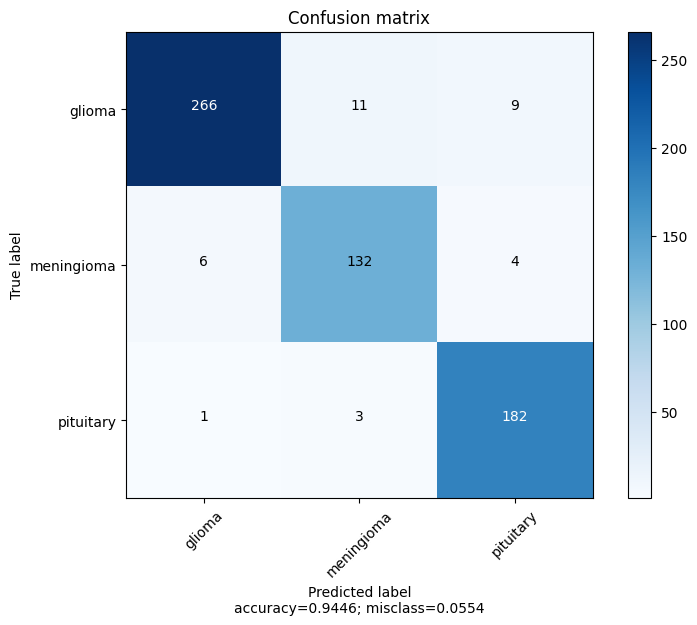

In [7]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [8]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 191.93it/s]


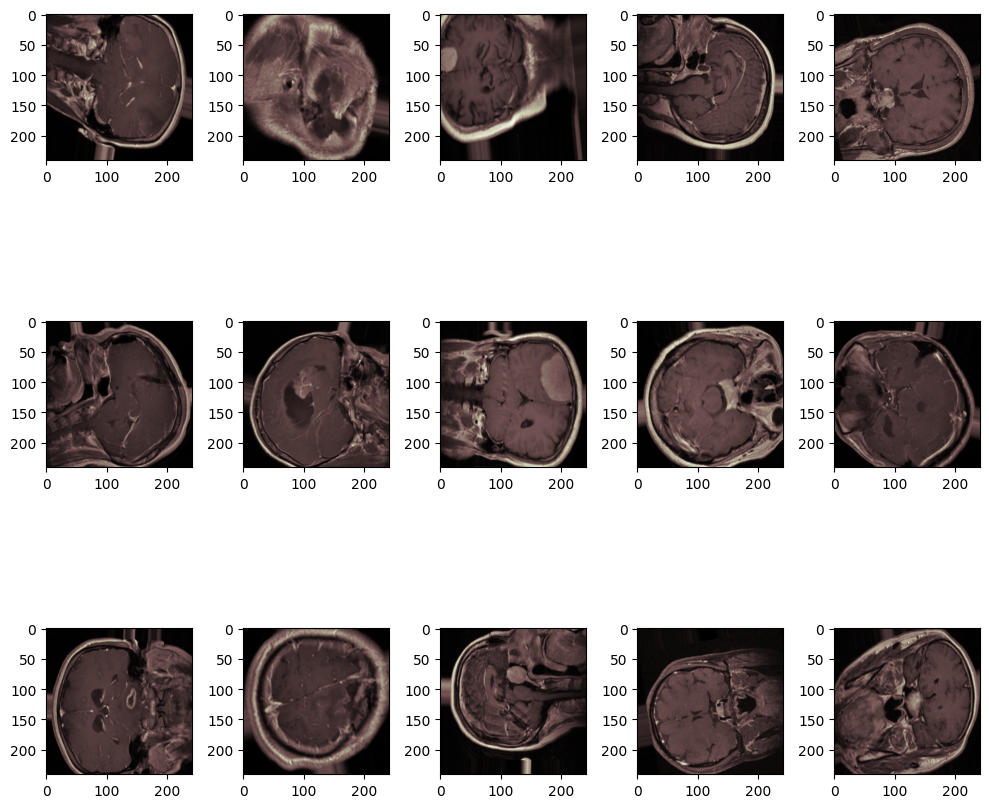

Epoch 1/50
261/264 [============================>.] - ETA: 0s - loss: 1.0086 - accuracy: 0.4696
Epoch 1: val_accuracy improved from -inf to 0.55882, saving model to DNNwithSVM.h5
Epoch 1: 5.35 seconds
264/264 [==============================] - 5s 17ms/step - loss: 1.0070 - accuracy: 0.4700 - val_loss: 0.9277 - val_accuracy: 0.5588 - lr: 1.0000e-04
Epoch 2/50
261/264 [============================>.] - ETA: 0s - loss: 0.8704 - accuracy: 0.5914
Epoch 2: val_accuracy improved from 0.55882 to 0.63378, saving model to DNNwithSVM.h5
Epoch 2: 3.87 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8700 - accuracy: 0.5917 - val_loss: 0.8148 - val_accuracy: 0.6338 - lr: 1.0000e-04
Epoch 3/50
261/264 [============================>.] - ETA: 0s - loss: 0.7917 - accuracy: 0.6368
Epoch 3: val_accuracy did not improve from 0.63378
Epoch 3: 3.79 seconds
264/264 [==============================] - 4s 14ms/step - loss: 0.7922 - accuracy: 0.6363 - val_loss: 0.8407 - val_accuracy: 0.6

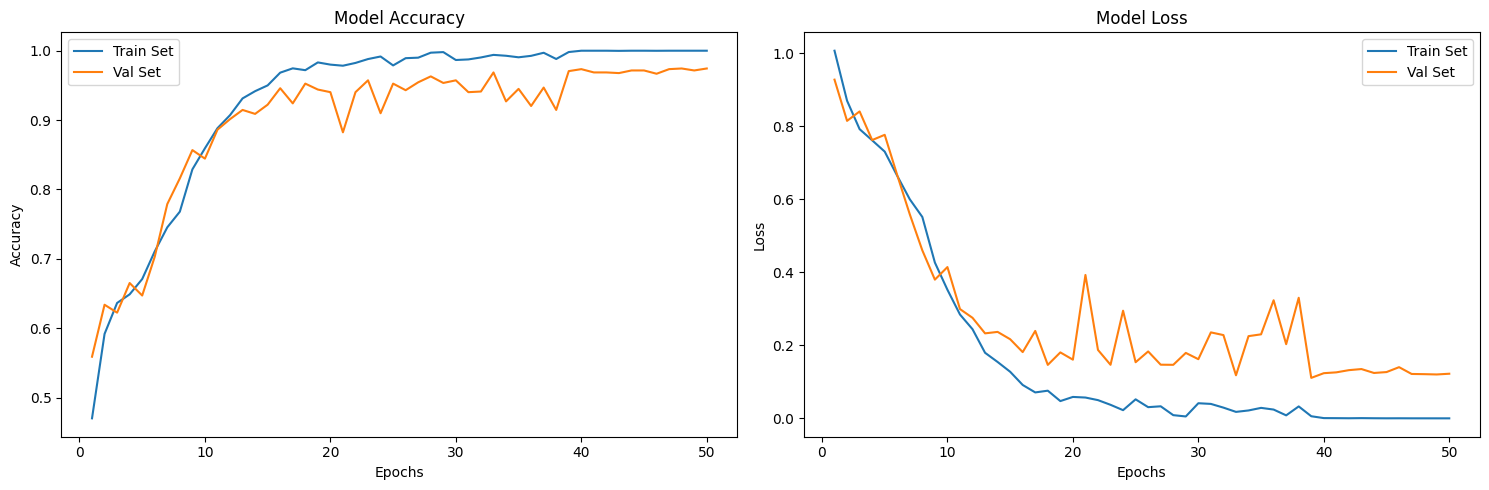

20/20 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9593
Test Accuracy:  95.93
              precision    recall  f1-score   support

      glioma     0.9819    0.9476    0.9644       286
  meningioma     0.9247    0.9507    0.9375       142
   pituitary     0.9531    0.9839    0.9683       186

    accuracy                         0.9593       614
   macro avg     0.9532    0.9607    0.9567       614
weighted avg     0.9599    0.9593    0.9594       614



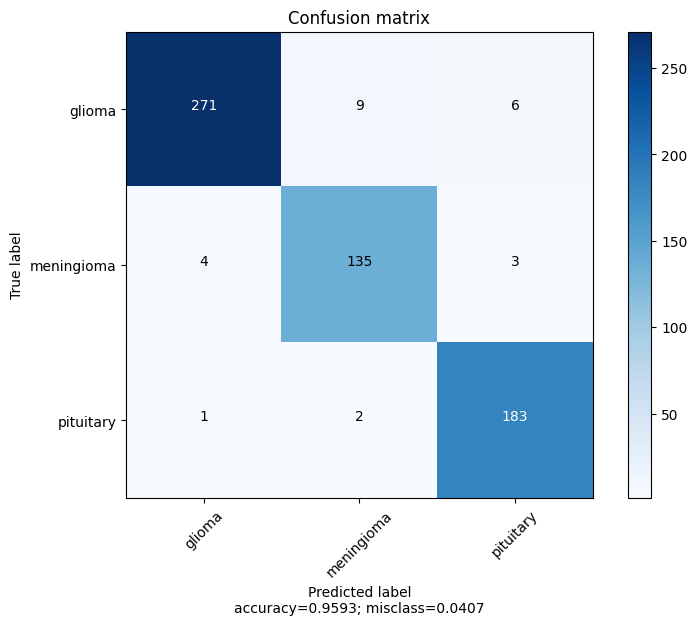

In [11]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 241
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='DNNwithSVM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 190.26it/s]


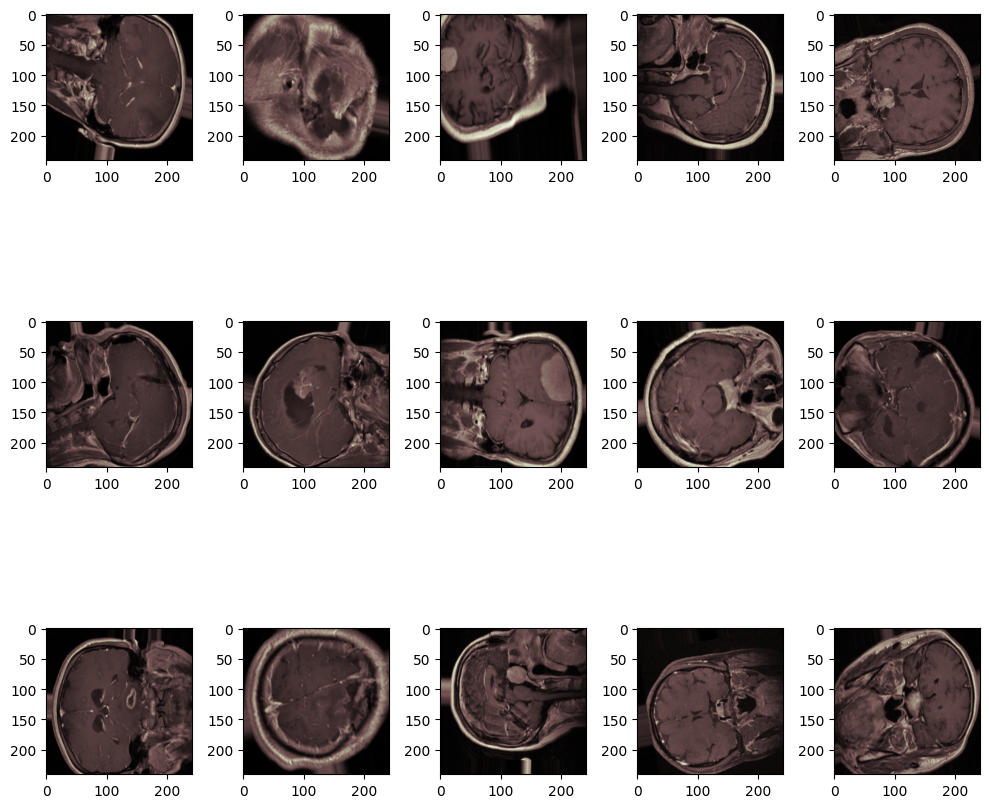

2024-03-15 19:14:05.421412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 19:14:05.721973: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


Epoch 1/50


2024-03-15 19:14:15.044064: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-15 19:14:15.918403: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-15 19:14:15.918423: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-15 19:14:15.918512: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-15 19:14:16.389563: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.0477 - accuracy: 0.4458
Epoch 1: val_accuracy improved from -inf to 0.50285, saving model to DNNwithSVM.h5
Epoch 1: 8.81 seconds
264/264 [==============================] - 9s 18ms/step - loss: 1.0477 - accuracy: 0.4458 - val_loss: 0.9550 - val_accuracy: 0.5028 - lr: 1.0000e-04
Epoch 2/50
261/264 [============================>.] - ETA: 0s - loss: 0.8702 - accuracy: 0.5893
Epoch 2: val_accuracy improved from 0.50285 to 0.63947, saving model to DNNwithSVM.h5
Epoch 2: 3.81 seconds
264/264 [==============================] - 4s 14ms/step - loss: 0.8697 - accuracy: 0.5893 - val_loss: 0.8062 - val_accuracy: 0.6395 - lr: 1.0000e-04
Epoch 3/50
261/264 [============================>.] - ETA: 0s - loss: 0.8115 - accuracy: 0.6262
Epoch 3: val_accuracy improved from 0.63947 to 0.65275, saving model to DNNwithSVM.h5
Epoch 3: 3.90 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8112 - accuracy: 0.6266 - val_loss: 0.

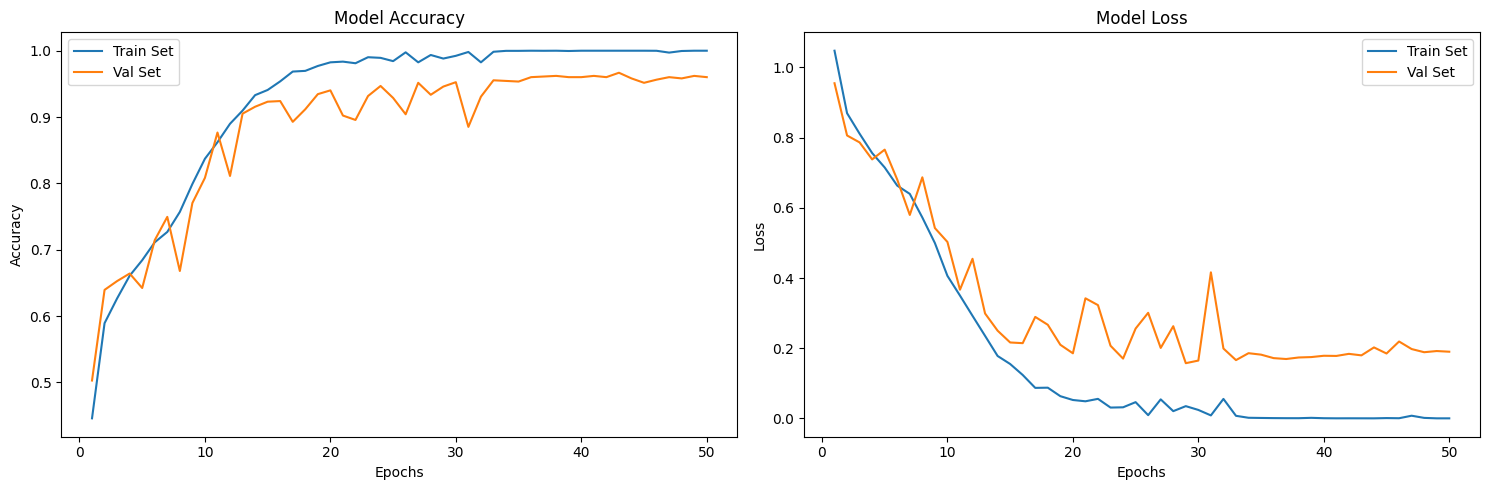

20/20 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.9397
Test Accuracy:  93.97
              precision    recall  f1-score   support

      glioma     0.9634    0.9196    0.9410       286
  meningioma     0.8808    0.9366    0.9078       142
   pituitary     0.9526    0.9731    0.9628       186

    accuracy                         0.9397       614
   macro avg     0.9323    0.9431    0.9372       614
weighted avg     0.9410    0.9397    0.9399       614



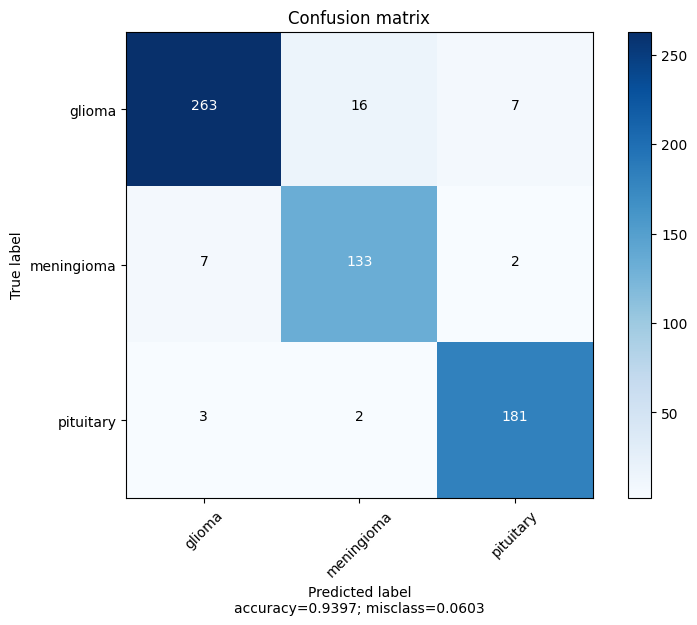

In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 241
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='DNNwithSVM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 191.07it/s]


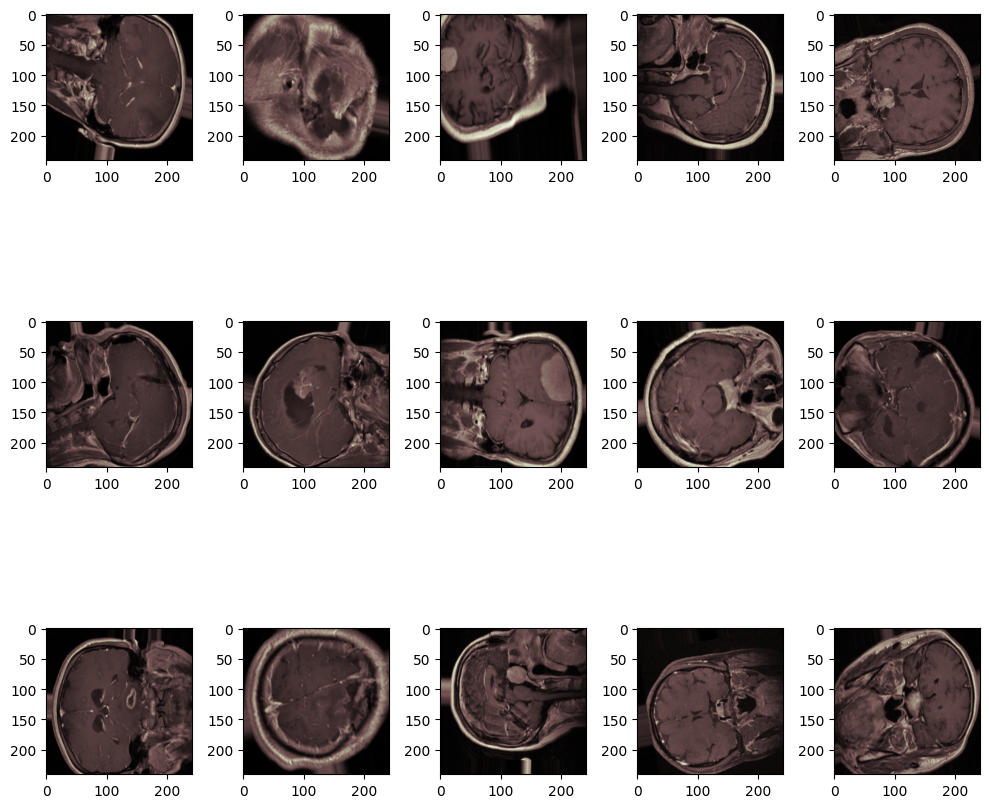

Epoch 1/50
261/264 [============================>.] - ETA: 0s - loss: 1.0479 - accuracy: 0.4384
Epoch 1: val_accuracy improved from -inf to 0.55123, saving model to DNNwithSVM.h5
Epoch 1: 5.27 seconds
264/264 [==============================] - 5s 17ms/step - loss: 1.0470 - accuracy: 0.4391 - val_loss: 0.9228 - val_accuracy: 0.5512 - lr: 1.0000e-04
Epoch 2/50
261/264 [============================>.] - ETA: 0s - loss: 0.8778 - accuracy: 0.5843
Epoch 2: val_accuracy improved from 0.55123 to 0.59867, saving model to DNNwithSVM.h5
Epoch 2: 3.87 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8769 - accuracy: 0.5853 - val_loss: 0.8448 - val_accuracy: 0.5987 - lr: 1.0000e-04
Epoch 3/50
261/264 [============================>.] - ETA: 0s - loss: 0.8086 - accuracy: 0.6324
Epoch 3: val_accuracy did not improve from 0.59867
Epoch 3: 3.79 seconds
264/264 [==============================] - 4s 14ms/step - loss: 0.8096 - accuracy: 0.6319 - val_loss: 0.8737 - val_accuracy: 0.5

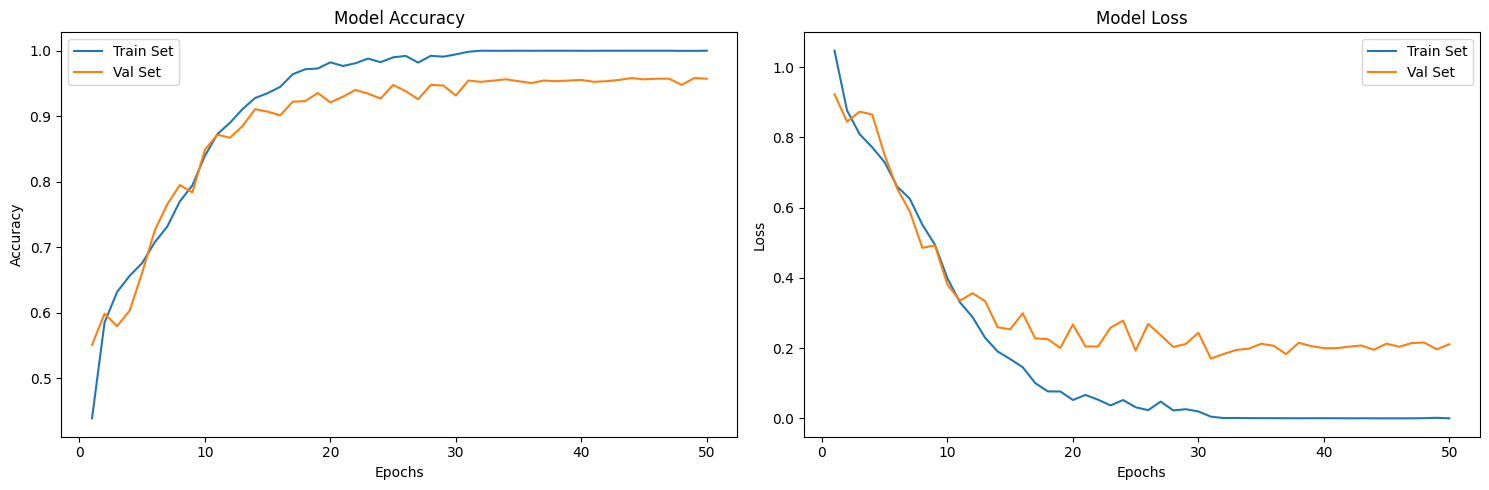

20/20 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.9414
Test Accuracy:  94.14
              precision    recall  f1-score   support

      glioma     0.9744    0.9301    0.9517       286
  meningioma     0.8808    0.9366    0.9078       142
   pituitary     0.9421    0.9624    0.9521       186

    accuracy                         0.9414       614
   macro avg     0.9324    0.9430    0.9372       614
weighted avg     0.9429    0.9414    0.9417       614



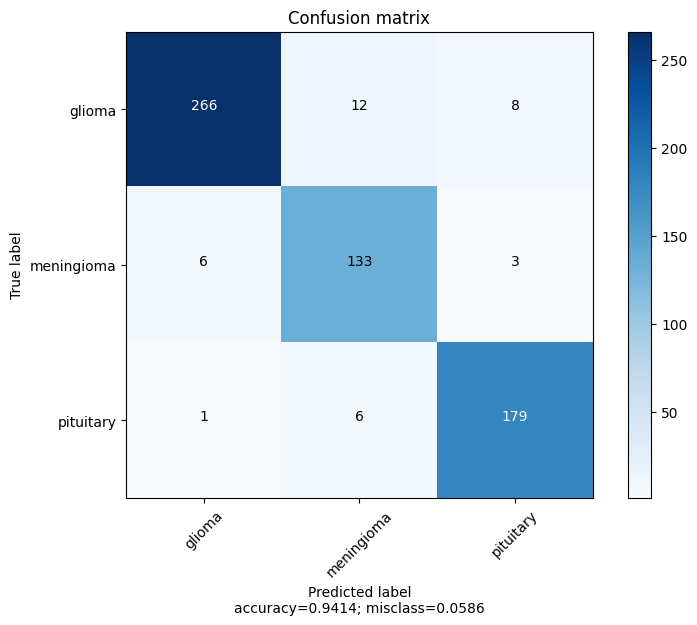

In [6]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 241
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='DNNwithSVM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 192.84it/s]


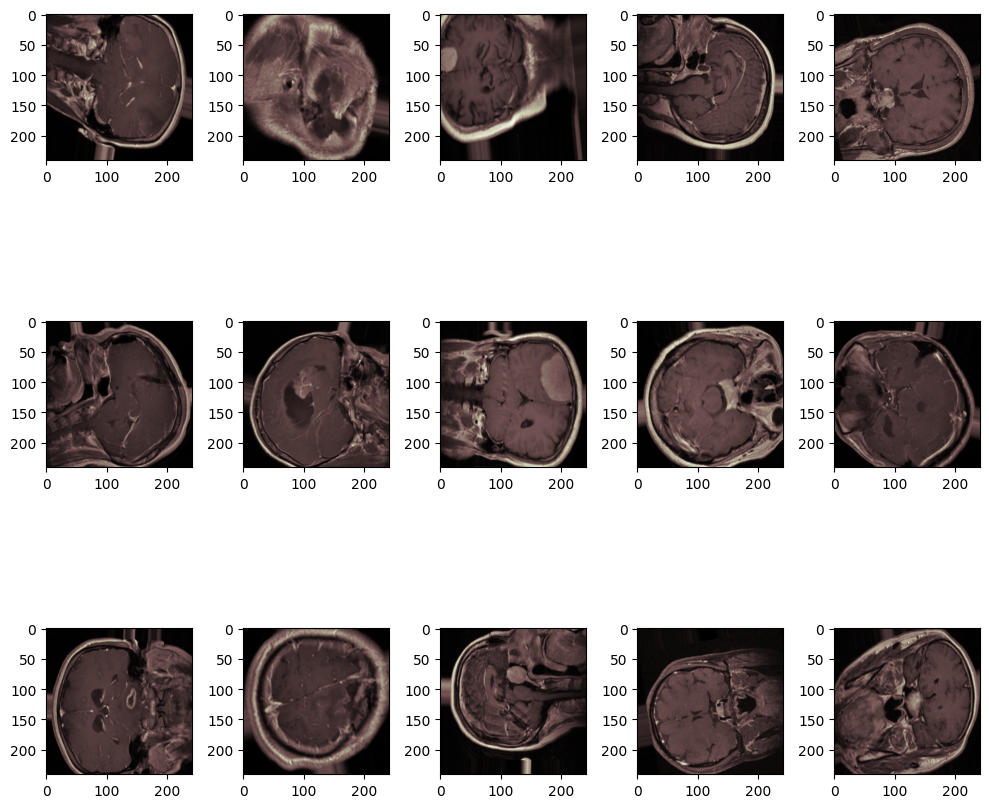

Epoch 1/50
261/264 [============================>.] - ETA: 0s - loss: 1.0590 - accuracy: 0.4298
Epoch 1: val_accuracy improved from -inf to 0.51139, saving model to DNNwithSVM.h5
Epoch 1: 4.98 seconds
264/264 [==============================] - 5s 17ms/step - loss: 1.0575 - accuracy: 0.4314 - val_loss: 0.9788 - val_accuracy: 0.5114 - lr: 1.0000e-04
Epoch 2/50
261/264 [============================>.] - ETA: 0s - loss: 0.8836 - accuracy: 0.5777
Epoch 2: val_accuracy improved from 0.51139 to 0.58349, saving model to DNNwithSVM.h5
Epoch 2: 3.84 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8826 - accuracy: 0.5778 - val_loss: 0.8669 - val_accuracy: 0.5835 - lr: 1.0000e-04
Epoch 3/50
261/264 [============================>.] - ETA: 0s - loss: 0.8262 - accuracy: 0.6191
Epoch 3: val_accuracy improved from 0.58349 to 0.60247, saving model to DNNwithSVM.h5
Epoch 3: 3.84 seconds
264/264 [==============================] - 4s 15ms/step - loss: 0.8262 - accuracy: 0.6187 - v

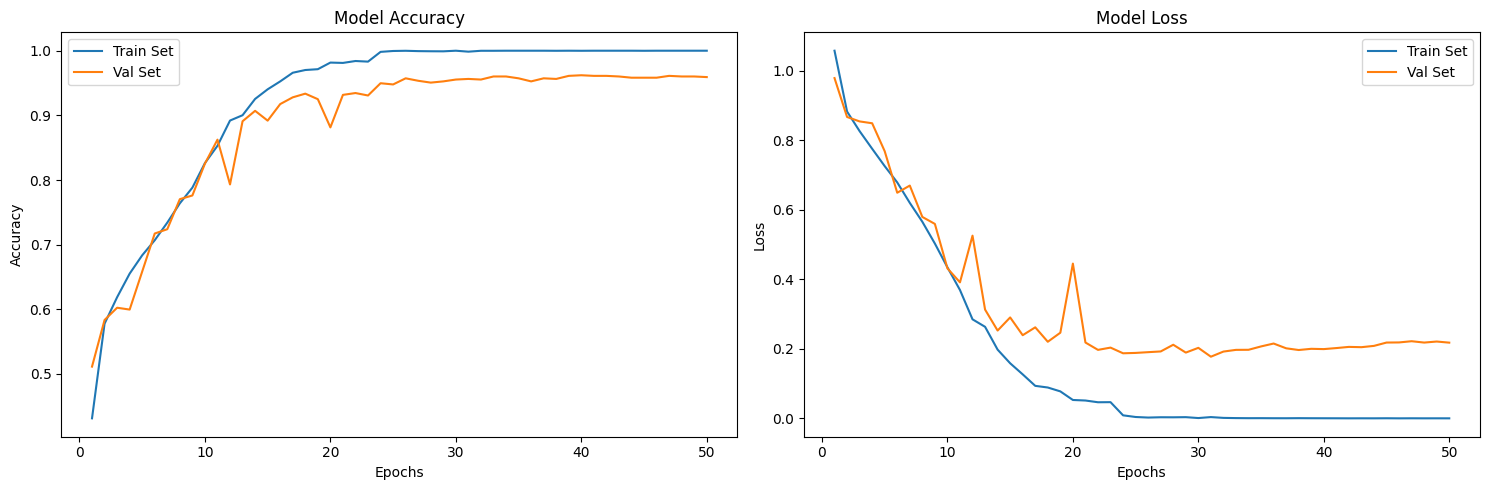

20/20 [==============================] - 0s 6ms/step - loss: 0.2468 - accuracy: 0.9414
Test Accuracy:  94.14
              precision    recall  f1-score   support

      glioma     0.9813    0.9161    0.9476       286
  meningioma     0.8590    0.9437    0.8993       142
   pituitary     0.9529    0.9785    0.9655       186

    accuracy                         0.9414       614
   macro avg     0.9310    0.9461    0.9375       614
weighted avg     0.9444    0.9414    0.9418       614



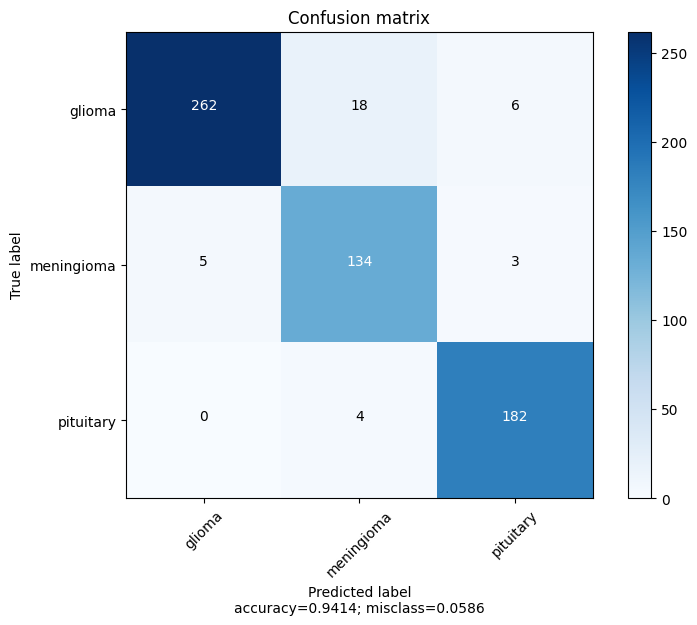

In [9]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 241
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='DNNwithSVM.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f